
# Ex 7. Structure-Constrained Time-Lapse Resistivity Inversion

This example combines structural constraints with time-lapse ERT inversion
to monitor water content changes in layered geological media.

The workflow demonstrates:
1. Loading meshes with geological structure from seismic interpretation
2. Time-lapse ERT inversion with structural constraints
3. Converting resistivity to water content using layer-specific petrophysics
4. Uncertainty quantification through Monte Carlo analysis
5. Time series analysis of water content at specific locations

This advanced approach provides the most reliable estimates of subsurface
water content evolution by combining temporal, spatial, and geological
constraints in the inversion process.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/mesh_with_interface.bms")

In [3]:
# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


24/05/25 - 23:49:11 - pyGIMLi - INFO - Found 3 regions.


24/05/25 - 23:49:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 23:49:11 - pyGIMLi - INFO - Found 3 regions.


24/05/25 - 23:49:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 23:49:11 - pyGIMLi - INFO - Found 3 regions.


24/05/25 - 23:49:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 23:49:12 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 23:49:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 23:49:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 23:49:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 23:49:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 23:49:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


24/05/25 - 23:50:16 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 23:50:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 23:50:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2615.1965682559885
dPhi: 1.0
ERTphi_d: 6496148.275547875, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 38.6698797929078
dPhi: 0.9852133945637991
ERTphi_d: 96055.98140558298, ERTphi_m: 3911.840413106006, ERTphi_t: 1751.5715778309886


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.71512411273858
dPhi: 0.4901684665605191
ERTphi_d: 48972.36829604263, ERTphi_m: 1532.263354543046, ERTphi_t: 1604.1891142838153


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.950844010344113
dPhi: 0.4445460273177576
ERTphi_d: 27201.896521694776, ERTphi_m: 904.6291706909549, ERTphi_t: 1592.4601000246003


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7289598325007243
dPhi: 0.8421162943360752
ERTphi_d: 4294.736223931799, ERTphi_m: 786.9211945189456, ERTphi_t: 1576.792286154432


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.2101059285067668
dPhi: 0.30009598501979085
ERTphi_d: 3005.903126410809, ERTphi_m: 715.9812388226311, ERTphi_t: 1576.6719581048555
Convergence reached at iteration 5


End of inversion

Window 0 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 1


25/05/25 - 00:16:37 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:16:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:16:37 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:16:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:16:37 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:16:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:16:37 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:16:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:16:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 00:17:12 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:17:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:17:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 00:17:46 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:17:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:17:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2425.0948439009862
dPhi: 1.0
ERTphi_d: 6023935.59225005, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 33.896758297105855
dPhi: 0.986022502013744
ERTphi_d: 84199.54761001095, ERTphi_m: 3515.870924062058, ERTphi_t: 214.22559851614665


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.286534907338428
dPhi: 0.401519911446207
ERTphi_d: 50391.75270982865, ERTphi_m: 1230.8593203927674, ERTphi_t: 189.76270060648517


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.185267217368878
dPhi: 0.4979296728647103
ERTphi_d: 25300.203767944295, ERTphi_m: 654.1313307473113, ERTphi_t: 168.2644983794063


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.561463866520395
dPhi: 0.8466938732979299
ERTphi_d: 3878.6762444366614, ERTphi_m: 530.4554800610844, ERTphi_t: 166.1228641217383


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.0413048301404944
dPhi: 0.33312268540612217
ERTphi_d: 2586.601198068988, ERTphi_m: 462.05586299437743, ERTphi_t: 167.54415006128227
Convergence reached at iteration 5


End of inversion

Window 1 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 2


25/05/25 - 00:43:52 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:43:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:43:52 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:43:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:43:52 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 00:43:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 00:43:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:43:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:43:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 00:44:28 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:44:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:44:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 00:45:03 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 00:45:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 00:45:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2361.5847598541677
dPhi: 1.0
ERTphi_d: 5866176.543477752, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 32.69104149721897
dPhi: 0.9861571593563139
ERTphi_d: 81204.54707909192, ERTphi_m: 3461.8511378676603, ERTphi_t: 293.6488156338041


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.711661567397186
dPhi: 0.36644228452742533
ERTphi_d: 51447.76733341461, ERTphi_m: 1193.5946105572111, ERTphi_t: 278.920031234841


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.316592678631928
dPhi: 0.5018944933480581
ERTphi_d: 25626.41621372171, ERTphi_m: 647.7852893171241, ERTphi_t: 261.6686062830837


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7087197199839619
dPhi: 0.8343716987564005
ERTphi_d: 4244.4597844401615, ERTphi_m: 524.9456574819867, ERTphi_t: 255.45562853250885


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1147070572387152
dPhi: 0.3476361019294739
ERTphi_d: 2768.9323301809686, ERTphi_m: 465.44827413189466, ERTphi_t: 257.13249491065085
Convergence reached at iteration 5


End of inversion

Window 2 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 3


25/05/25 - 01:12:07 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:12:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:12:08 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:12:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:12:08 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:12:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:12:08 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:12:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:12:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 01:12:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:12:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:12:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 01:13:28 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:13:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:13:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2335.692647600651
dPhi: 1.0
ERTphi_d: 5801860.536640017, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 32.84218650776475
dPhi: 0.9859389947810547
ERTphi_d: 81579.99128528764, ERTphi_m: 3396.3088238770597, ERTphi_t: 264.98527008144606


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.443577597818365
dPhi: 0.34707216912161
ERTphi_d: 53265.84675298082, ERTphi_m: 1146.888850959584, ERTphi_t: 251.92593213900182


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 11.145533220206142
dPhi: 0.4802390986595413
ERTphi_d: 27685.504518992057, ERTphi_m: 631.8435951313625, ERTphi_t: 235.7076312864342


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.8269354206432367
dPhi: 0.8360836234078851
ERTphi_d: 4538.1075848778, ERTphi_m: 492.413393657297, ERTphi_t: 230.90206622607468


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.0743801965529047
dPhi: 0.41192218158722244
ERTphi_d: 2668.7604082374155, ERTphi_m: 437.6731178295223, ERTphi_t: 231.40742253656697
Convergence reached at iteration 5


End of inversion

Window 3 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 4


25/05/25 - 01:41:09 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:41:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:41:10 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:41:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:41:10 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 01:41:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 01:41:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:41:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:41:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 01:41:53 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:41:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:41:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 01:42:34 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 01:42:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 01:42:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2119.8280193897986
dPhi: 1.0
ERTphi_d: 5265652.80016426, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 31.29125258172662
dPhi: 0.9852387777237072
ERTphi_d: 77727.47141300893, ERTphi_m: 3378.0388957302353, ERTphi_t: 2001.5042555025548


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.212827545072496
dPhi: 0.3220844231253208
ERTphi_d: 52692.663621960084, ERTphi_m: 1227.8198287863872, ERTphi_t: 1864.5724434263752


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.56606145643853
dPhi: 0.5019022601306676
ERTphi_d: 26246.096657793307, ERTphi_m: 783.1948632244729, ERTphi_t: 1807.242547829128


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 2.094596610835727
dPhi: 0.8017618372303368
ERTphi_d: 5202.977981315946, ERTphi_m: 644.5710307048003, ERTphi_t: 1777.553703902156


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.216718156958779
dPhi: 0.41911576163903064
ERTphi_d: 3022.3279018856074, ERTphi_m: 599.9785095219738, ERTphi_t: 1770.6533264941186
Convergence reached at iteration 5


End of inversion

Window 4 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 5


25/05/25 - 02:10:21 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:10:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:10:21 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:10:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:10:21 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:10:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:10:22 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:10:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:10:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 02:11:03 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:11:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:11:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 02:11:43 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:11:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:11:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 1950.9720474804678
dPhi: 1.0
ERTphi_d: 4846214.565941482, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 30.856581525764383
dPhi: 0.9841839960928127
ERTphi_d: 76647.74850999872, ERTphi_m: 3229.5085125730043, ERTphi_t: 1985.6063112935867


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.116738913265014
dPhi: 0.3480567866382704
ERTphi_d: 49969.97946055029, ERTphi_m: 1173.7246121750659, ERTphi_t: 1872.3858662655107


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.930148518578893
dPhi: 0.5560836894547387
ERTphi_d: 22182.488920149968, ERTphi_m: 734.6911184928763, ERTphi_t: 1845.2244701111406


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.8894245373842358
dPhi: 0.7884218237296561
ERTphi_d: 4693.330550862442, ERTphi_m: 601.9878543626232, ERTphi_t: 1815.0482783627258


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1903409005311403
dPhi: 0.36999817829238285
ERTphi_d: 2956.8067969193526, ERTphi_m: 556.348104767872, ERTphi_t: 1810.142655550036
Convergence reached at iteration 5


End of inversion

Window 5 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 6


25/05/25 - 02:38:40 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:38:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:38:41 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:38:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:38:41 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 02:38:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 02:38:41 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:38:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:38:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 02:39:25 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:39:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:39:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 02:40:02 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 02:40:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 02:40:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 1883.9011044467438
dPhi: 1.0
ERTphi_d: 4679610.343445712, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 34.15432502591919
dPhi: 0.9818704257111471
ERTphi_d: 84839.34336438327, ERTphi_m: 3099.379144233677, ERTphi_t: 1337.9571928780342


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.4455626387924
dPhi: 0.4306559235459796
ERTphi_d: 48302.77759476032, ERTphi_m: 1131.3022062172392, ERTphi_t: 1223.3819513747835


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.705119928649943
dPhi: 0.5523338619534773
ERTphi_d: 21623.517902766456, ERTphi_m: 692.6440236096402, ERTphi_t: 1191.9750224866038


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7479441699931608
dPhi: 0.799205044350923
ERTphi_d: 4341.893318263012, ERTphi_m: 562.3685518408804, ERTphi_t: 1165.8410434804728


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.159334778134536
dPhi: 0.33674381708709145
ERTphi_d: 2879.787588886187, ERTphi_m: 516.0098008087125, ERTphi_t: 1166.922658357289
Convergence reached at iteration 5


End of inversion

Window 6 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 7


25/05/25 - 03:06:49 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:06:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:06:49 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:06:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:06:49 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:06:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:06:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:06:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:06:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 03:07:33 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:07:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:07:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 03:08:13 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:08:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:08:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2081.2660759246382
dPhi: 1.0
ERTphi_d: 5169864.932596801, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 39.903067463293006
dPhi: 0.9808275030641792
ERTphi_d: 99119.21957881983, ERTphi_m: 3248.5067617708, ERTphi_t: 1402.4141779739743


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 18.799390001322738
dPhi: 0.5288735629506084
ERTphi_d: 46697.68476328568, ERTphi_m: 1223.773065000434, ERTphi_t: 1266.0410278952536


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.400185148690408
dPhi: 0.4999739274503585
ERTphi_d: 23350.059909346975, ERTphi_m: 721.7859126764704, ERTphi_t: 1204.021912159161


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7083670476429573
dPhi: 0.8182624043441358
ERTphi_d: 4243.583746345106, ERTphi_m: 611.0630909509542, ERTphi_t: 1185.269498084508


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1842092347411417
dPhi: 0.30681803048413914
ERTphi_d: 2941.575739096996, ERTphi_m: 560.2452443305865, ERTphi_t: 1186.0200563711237
Convergence reached at iteration 5


End of inversion

Window 7 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 8


25/05/25 - 03:35:08 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:35:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:35:09 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:35:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:35:09 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 03:35:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 03:35:09 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:35:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:35:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 03:35:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:35:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:35:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 03:36:36 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 03:36:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 03:36:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2340.2791399388534
dPhi: 1.0
ERTphi_d: 5813253.383608112, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 44.156858574549496
dPhi: 0.9811317984162764
ERTphi_d: 109685.63669918095, ERTphi_m: 3446.358160861021, ERTphi_t: 632.1433796567612


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.659654272406765
dPhi: 0.5547768816204258
ERTphi_d: 48834.581212658406, ERTphi_m: 1299.939647861536, ERTphi_t: 581.3751788328511


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 11.150287779876704
dPhi: 0.4328339844955133
ERTphi_d: 27697.314845213732, ERTphi_m: 742.561787269457, ERTphi_t: 578.8283664560083


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7842668651073017
dPhi: 0.8399801959975035
ERTphi_d: 4432.118892926537, ERTphi_m: 632.0403889145516, ERTphi_t: 569.2596919536868


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1505729470848538
dPhi: 0.3551564681353532
ERTphi_d: 2858.023200558777, ERTphi_m: 567.3276512809908, ERTphi_t: 568.4319826482738
Convergence reached at iteration 5


End of inversion

Window 8 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 9


25/05/25 - 04:03:45 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 04:03:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 04:03:45 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 04:03:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 04:03:45 - pyGIMLi - INFO - Found 3 regions.


25/05/25 - 04:03:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


25/05/25 - 04:03:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 04:03:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 04:03:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


25/05/25 - 04:04:31 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 04:04:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 04:04:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


25/05/25 - 04:05:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


25/05/25 - 04:05:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


25/05/25 - 04:05:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11099 Cells: 21776 Boundaries: 16542


ERT chi2: 2547.657198132509
dPhi: 1.0
ERTphi_d: 6328380.480161153, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 43.46633915851419
dPhi: 0.9829387018040041
ERTphi_d: 107970.38646974924, ERTphi_m: 3910.8975818214594, ERTphi_t: 789.3956105311133


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.56892883112279
dPhi: 0.5267848816043266
ERTphi_d: 51093.21921650901, ERTphi_m: 1614.7994333759652, ERTphi_t: 724.9882822382926


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 12.036159145909993
dPhi: 0.4148378243354066
ERTphi_d: 29897.819318440423, ERTphi_m: 978.2546707801371, ERTphi_t: 722.7033443825962


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.871945018597798
dPhi: 0.8444732247301746
ERTphi_d: 4649.91142619693, ERTphi_m: 874.6116079172833, ERTphi_t: 715.2738649009859


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1600226894163403
dPhi: 0.3803115594253571
ERTphi_d: 2881.4963605101893, ERTphi_m: 798.0393673814558, ERTphi_t: 712.9429032611029
Convergence reached at iteration 5


End of inversion

Window 9 results:
Model shape: (4531, 3)
Coverage available: True
Number of iterations: 6



Final result summary:
Model shape: (4531, 12)
Number of coverage arrays: 12
Number of chi2 values: 60
Mesh exists: True
Inversion complete!


In [4]:
result.final_models = np.array(result.final_models)
result.final_models.shape
result.all_coverage = np.array(result.all_coverage)
result.all_coverage.shape

(12, 4531)

In [5]:
np.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/resmodel.npy", result.final_models[result.mesh.cellMarkers(),:])
np.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/all_coverage.npy", result.all_coverage[:,result.mesh.cellMarkers()])
result.mesh.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/mesh_res.bms")

1

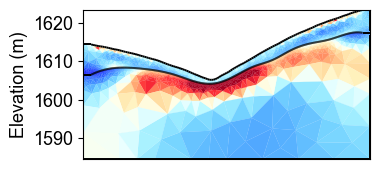

<Figure size 640x480 with 0 Axes>

In [6]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i][result.mesh.cellMarkers()],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    if i ==0:
        ax.plot([40],[1607],'*',c='k')
        ax.plot([80],[1621],'*',c='k')

        ax.plot([30],[1604],'*',c='k')
        ax.plot([65],[1608],'*',c='k')
        
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()